<a href="https://colab.research.google.com/github/pampamlopes/ai_unsupervised/blob/main/Chove_Affinity_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Infornações gerais sobre o algoritmo:**

Indicada para utilização em dataset de pequeno e médio porte, devido a sua complexidade e tempo de execução.

Sua primeira publicação foi em 2007.


Não precisamos informar no numero de clusters, pois o algoritmo faz um distribuição conforme as afinidades encontradas.

O algoritmo escolhe o mumero de cluster baseado nos dados fornecidos e recebe dois parâmetros: preference e damping.


Preference: Indica a quantidade de exemplares utilizados.

Damping: controla a quantidade de troca de mensagens.






# **Informações gerais sobre o dataset escolhido:**

Link de acesso aos dados: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

O dataset possui dados historicos de 10 anos de observações meteologicas de locais situados na Austrália.

O objetivo da análise é identificar se poderá chover no dia seguinte. 




# **Implementando um Affinity Propagation**

In [ ]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [ ]:
df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am','WindDir3pm'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Humidity9am    142806 non-null  float64
 9   Humidity3pm    140953 non-null  float64
 10  Pressure9am    130395 non-null  float64
 11  Pressure3pm    130432 non-null  float64
 12  Cloud9am       89572 non-null   float64
 13  Cloud3pm       86102 non-null   float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      142199 non-null  float64
 17  RainTomorrow   142193 non-nul

In [ ]:
df.dropna(subset=[
                  'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                  'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58090 entries, 6049 to 142302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        58090 non-null  float64
 1   MaxTemp        58090 non-null  float64
 2   Rainfall       58090 non-null  float64
 3   Evaporation    58090 non-null  float64
 4   Sunshine       58090 non-null  float64
 5   WindGustSpeed  58090 non-null  float64
 6   WindSpeed9am   58090 non-null  float64
 7   WindSpeed3pm   58090 non-null  float64
 8   Humidity9am    58090 non-null  float64
 9   Humidity3pm    58090 non-null  float64
 10  Pressure9am    58090 non-null  float64
 11  Pressure3pm    58090 non-null  float64
 12  Cloud9am       58090 non-null  float64
 13  Cloud3pm       58090 non-null  float64
 14  Temp9am        58090 non-null  float64
 15  Temp3pm        58090 non-null  float64
 16  RainToday      58090 non-null  float64
 17  RainTomorrow   58090 non-null  float64
dtypes:

In [ ]:
labels_true = df.iloc[:5000,-1].values
labels_true

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#X = df.iloc[:2000, [2,3,4,14,17,18,19,20]]
X = df.iloc[:5000,:-1].values
X.shape


(5000, 17)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_enc = scaler.fit_transform(X)
X_enc

array([[ 0.62490589,  1.75806727, -0.31509015, ...,  1.46793555,
         1.73669755, -0.52489066],
       [ 0.70979775,  0.69402753, -0.31509015, ...,  0.20177391,
         0.62450599, -0.52489066],
       [ 0.87958145,  2.16341575, -0.31509015, ...,  1.88998943,
         1.99736745, -0.52489066],
       ...,
       [ 1.15123537,  0.15356289, -0.10147876, ...,  0.72431681,
        -0.03585775,  1.90515869],
       [ 1.20217048,  0.20423145, -0.31509015, ...,  0.62382779,
         0.12054419, -0.52489066],
       [ 0.74375449,  0.08600481, -0.31509015, ...,  0.86500144,
         0.06841021, -0.52489066]])

In [ ]:
af = AffinityPropagation()
clustering = af.fit(X_enc)

In [ ]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

193

In [ ]:
n_clusters_

122

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))

Estimated number of clusters: 193
Homogeneity: 0.349
Completeness: 0.036
V-measure: 0.064
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.058


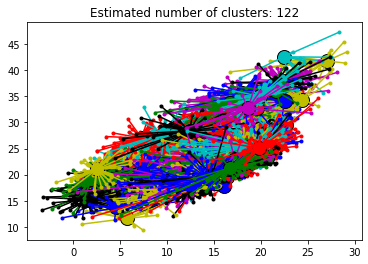

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()